In [ ]:
#%pip install pandas
#%pip install numpy
#%pip install matplotlib
#%pip install sklearn
#%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
df = pd.read_csv("data/mobile_price.csv")

In [3]:
print(df.info())
print(df.describe())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Description:
our task is to classify each mobile phone based on it's features like having technologies like bluetooth, 4g, being dualsim, etc..
into 4 classes of price from 0 to 4 (inclusive) meaning 0=cheap 1=economy 2=mid 3=expensive 4=luxuries

/tmp/ipykernel_44037/1631636461.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<AxesSubplot: title={'center': 'battery_power'}>,
        <AxesSubplot: title={'center': 'blue'}>,
        <AxesSubplot: title={'center': 'clock_speed'}>,
        <AxesSubplot: title={'center': 'dual_sim'}>,
        <AxesSubplot: title={'center': 'fc'}>],
       [<AxesSubplot: title={'center': 'four_g'}>,
        <AxesSubplot: title={'center': 'int_memory'}>,
        <AxesSubplot: title={'center': 'm_dep'}>,
        <AxesSubplot: title={'center': 'mobile_wt'}>,
        <AxesSubplot: title={'center': 'n_cores'}>],
       [<AxesSubplot: title={'center': 'pc'}>,
        <AxesSubplot: title={'center': 'px_height'}>,
        <AxesSubplot: title={'center': 'px_width'}>,
        <AxesSubplot: title={'center': 'ram'}>,
        <AxesSubplot: title={'center': 'sc_h'}>],
       [<AxesSubplot: title={'center': 'sc_w'}>,
        <AxesSubplot: title={'center': 'talk_time'}>,
        <AxesSubplot: title={'center': 'three_g'}>,
        <AxesSubplot: title={'center': 'touch_screen'}>,
        <

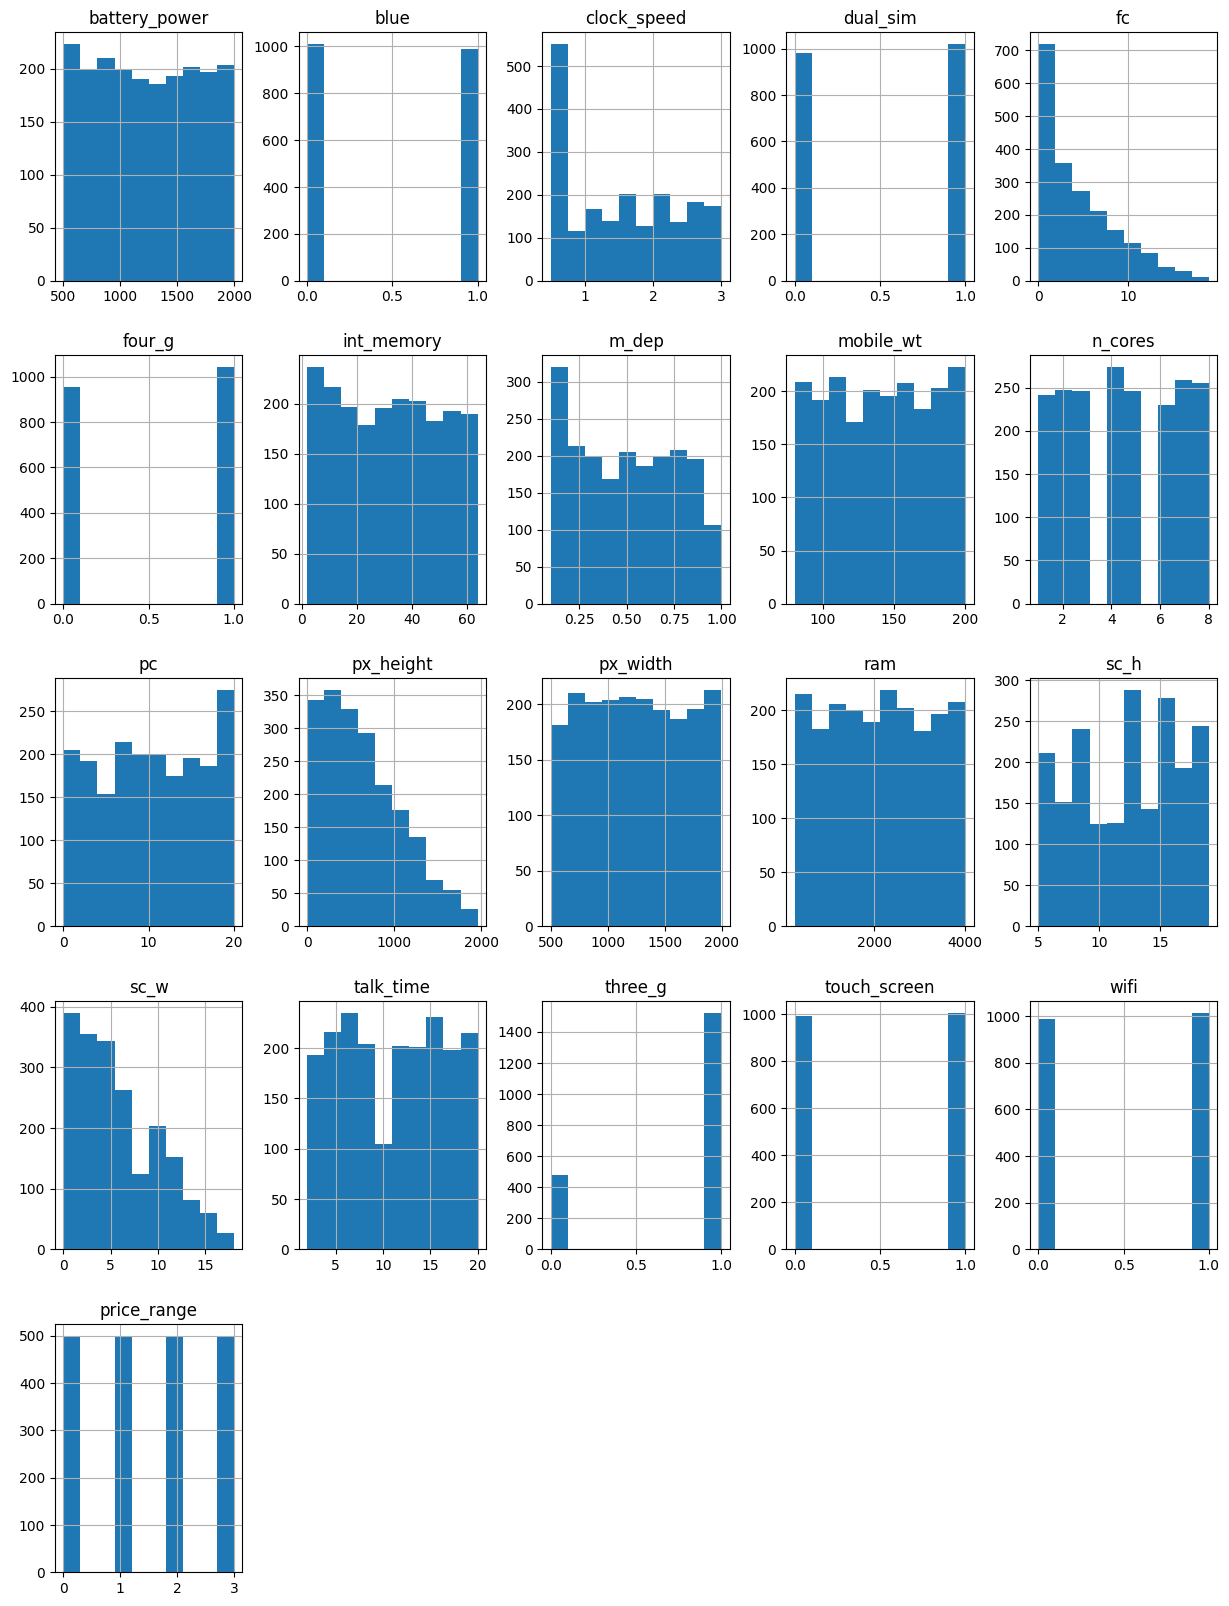

In [4]:
# plotting distributions
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
df.hist(ax=ax)

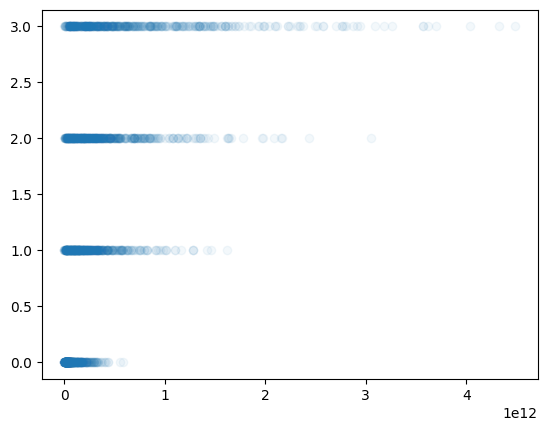

In [5]:
# from this plot we can get a rough intuition about classes, the higher the class the more expensive the phone is
plt.scatter(
    df.battery_power * df.clock_speed * df.ram * df.px_height * df.mobile_wt, # a rough linear combination of features score
    df.price_range, alpha=0.05
)

In [6]:
# we have 4 classes for price range
classes = df.price_range.unique()
print(classes)

[1 2 3 0]


## Training our Model

In [7]:

from knn import KNNClassifier, euclidean_distance,manhattan_distance
from sklearn.model_selection import train_test_split

X = df.drop(["price_range"], axis=1)
Y = df.price_range

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)  # train and test input outputs

ks = [1, 3, 7, 23]
classifiers = [[k, KNNClassifier(k, distance=manhattan_distance), None] for k in ks]

# training classifiers
for classifier in classifiers:
    classifier[1].train(train_X.to_numpy(), train_Y.to_numpy())

In [8]:
# using classifiers to predicate
for classifier in classifiers:
    classifier[2] = (classifier[1].predicate(test_X.to_numpy()),classifier[1].predicate(train_X.to_numpy()))

## Metrics

In [9]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# returns a dictionary containing various metrics
def metric(k, result, actual_result):
    cnf_matrix = confusion_matrix(actual_result, result)

    return {
        "ConfusionMatrix": cnf_matrix,
        "ClassificationReport": classification_report(actual_result, result),
        "NumberOfMislabeled": (actual_result != result).sum(),
        "PrecisionScore": precision_score(actual_result, result, average="micro"),
        "RecallScore": recall_score(actual_result, result, average="micro"),
        "AccuracyScore": accuracy_score(actual_result, result),
        "F1Score": f1_score(actual_result, result, average="micro"),
        "R2score": r2_score(actual_result, result)
    }


In [10]:
# appending each metric to each classifier
for c in classifiers:
    c.append((metric(c[0], c[2][0], test_Y),metric(c[0], c[2][1], train_Y)))

In [11]:
# print textual reports for each classifier
for c in classifiers:
    print(f" --- classifier with k = {c[0]} ---")
    print("ConfusionMatrix (test):")
    print(c[3][0]["ConfusionMatrix"])
    print("ClassificationReport (test)")
    print(c[3][0]["ClassificationReport"])
    print(f"Number Of Mislabeled: {c[3][0]['NumberOfMislabeled']}")
    print("ConfusionMatrix (train):")
    print(c[3][1]["ConfusionMatrix"])
    print("ClassificationReport (train)")
    print(c[3][1]["ClassificationReport"])
    print(f"Number Of Mislabeled: {c[3][1]['NumberOfMislabeled']}")
    print("------------------")

 --- classifier with k = 1 ---
ConfusionMatrix (test):
[[105   7   0   0]
 [  8  73   7   0]
 [  0   9  82   9]
 [  0   0   9  91]]
ClassificationReport (test)
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       112
           1       0.82      0.83      0.82        88
           2       0.84      0.82      0.83       100
           3       0.91      0.91      0.91       100

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400

Number Of Mislabeled: 49
ConfusionMatrix (train):
[[388   0   0   0]
 [  0 412   0   0]
 [  0   0 400   0]
 [  0   0   0 400]]
ClassificationReport (train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       388
           1       1.00      1.00      1.00       412
           2       1.00      1.00      1.00       400
           3       1.00      1.0

## Comparison plot


### Test result comparison:

<AxesSubplot: >

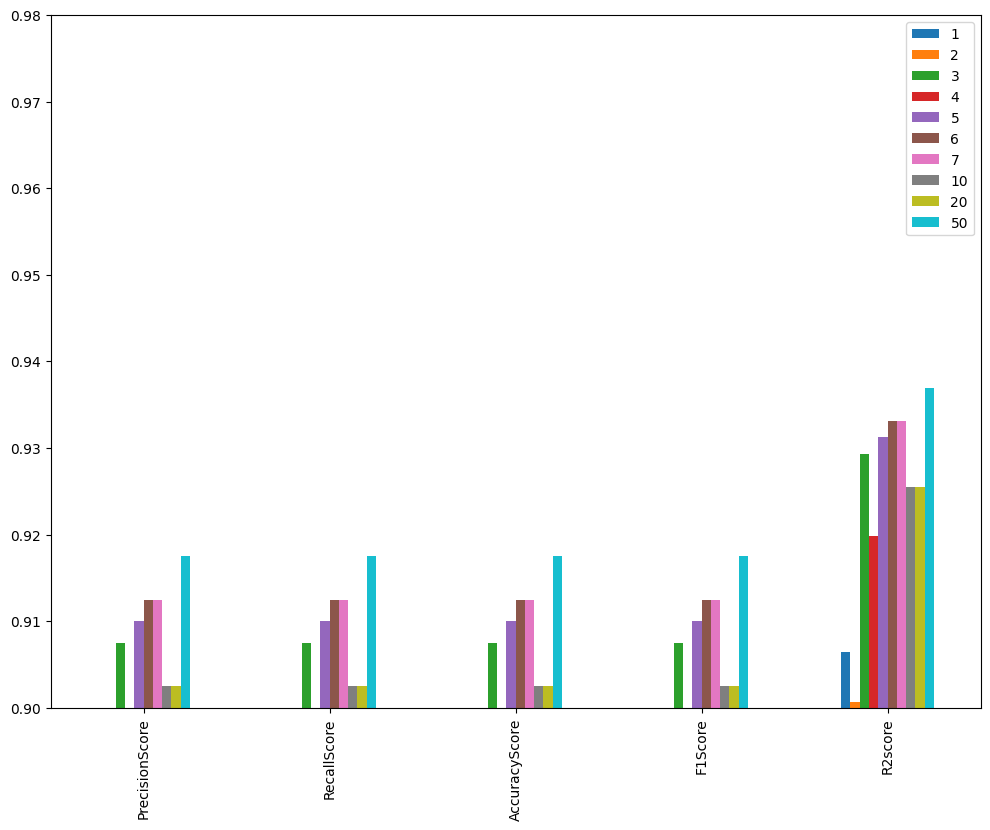

In [17]:
index_test = list(classifiers[0][3][0].keys())
index_test.remove("ClassificationReport")
index_test.remove("ConfusionMatrix")
index_test.remove("NumberOfMislabeled")
items_test = {}
for c in classifiers:
    items_test[c[0]] = [c[3][0][w] for w in index_test]
compare_df = pd.DataFrame(items_test, index=index_test)
compare_df.plot.bar(figsize=(12, 9), ylim=[0.9, 0.98])

### Train Result comparison

<AxesSubplot: >

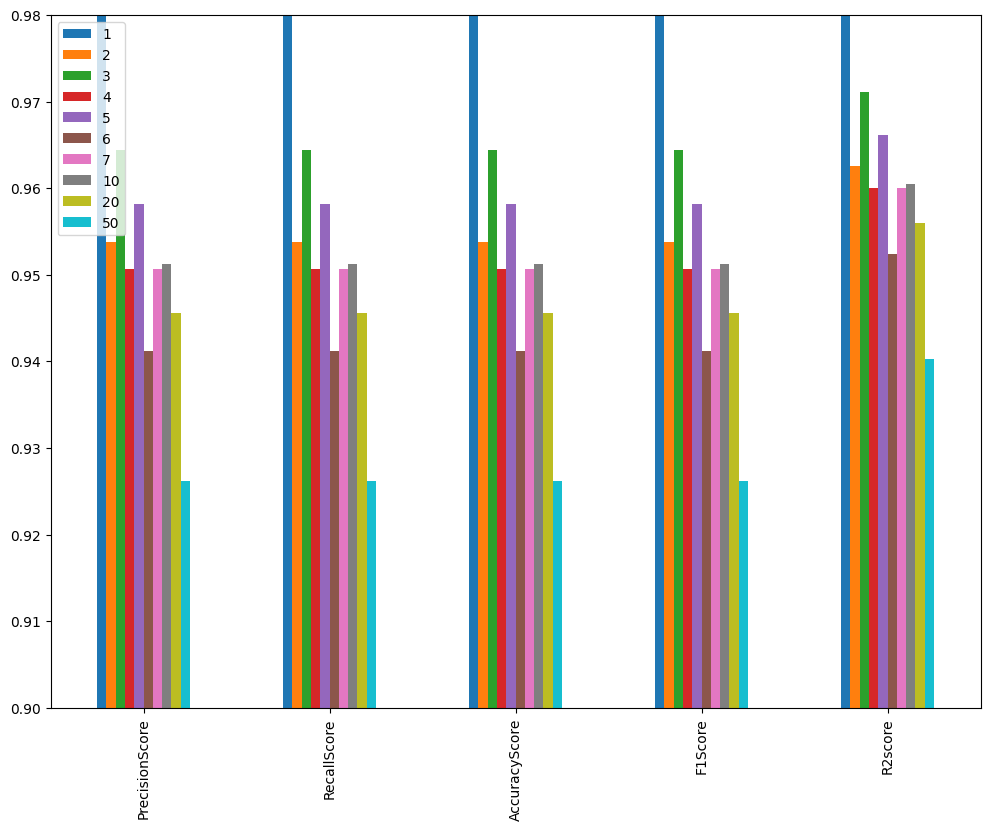

In [18]:
index_train = list(classifiers[0][3][1].keys())
index_train.remove("ClassificationReport")
index_train.remove("ConfusionMatrix")
index_train.remove("NumberOfMislabeled")
items_train = {}
for c in classifiers:
    items_train[c[0]] = [c[3][1][w] for w in index_train]
compare_df = pd.DataFrame(items_train, index=index_train)
compare_df.plot.bar(figsize=(12, 9), ylim=[0.9, 0.98])